                     REAL TIME ELECTION RESULTS , PORTUGAL 2019
                            DSML CAPSTONE PROJECT

NAME: ANSAR MH

ORGANIZATION: ENTRI ELEVATE

                               PROJECT OVERVIEW
Elections are part of a system that the people selecting one or more for the betterement of the society. And those who winning the election are committed to the society and its people. to serve them , to give them what they wanted and creating a better society without much problems are the aim of it

                               OBJECTIVE
This project is for analysing the results of election happens in portugal 2019. aim of the project to know who habe the strong hold in protugal and what they getting to winning the elections

                                DATA DESCRIPTION
Source : UCI Machine Learning Repository
Link : https://archive.ics.uci.edu/dataset/513/real+time+election+results+portugal+2019
Features : Instances - 21643
           Features - 29

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler 
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
#LOADING THE DATA
data=pd.read_csv('ElectionData.csv')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [6]:
df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [8]:
df.shape

(21643, 28)

In [9]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [10]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [11]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [12]:
#CHECKING NULL VALUES
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [13]:
#CHECKING DUPLICATES
df.duplicated().sum()

0

In [14]:
#FINDINGF NUMERICAL COLUMNS
numerical_columns=df.select_dtypes(include='number')
numerical_columns

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,38.29,40.22,147993,94,106
1,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,33.28,34.95,128624,81,77
2,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,6.81,7.15,26307,16,19
3,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,4.90,5.14,18923,12,5
4,0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,1.91,52.66,813743,428546,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.19,0.20,332,0,0
21639,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.18,0.19,326,0,0
21640,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.14,0.15,256,0,0
21641,265,8,0,277,277,4995,2.81,3700,2.08,51.04,...,1.90,51.28,371931,190712,0,0.13,0.14,239,0,0


In [15]:
#FINDING CATEGORICAL COLUMNS
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns

,time,territoryName,Party
0,2019-10-06 20:10:02,Território Nacional,PS
1,2019-10-06 20:10:02,Território Nacional,PPD/PSD
2,2019-10-06 20:10:02,Território Nacional,B.E.
3,2019-10-06 20:10:02,Território Nacional,CDS-PP
4,2019-10-06 20:10:02,Território Nacional,PCP-PEV
...,...,...,...
21638,2019-10-07 00:35:01,Viseu,NC
21639,2019-10-07 00:35:01,Viseu,PNR
21640,2019-10-07 00:35:01,Viseu,MPT
21641,2019-10-07 00:35:01,Viseu,PTP


<Axes: >

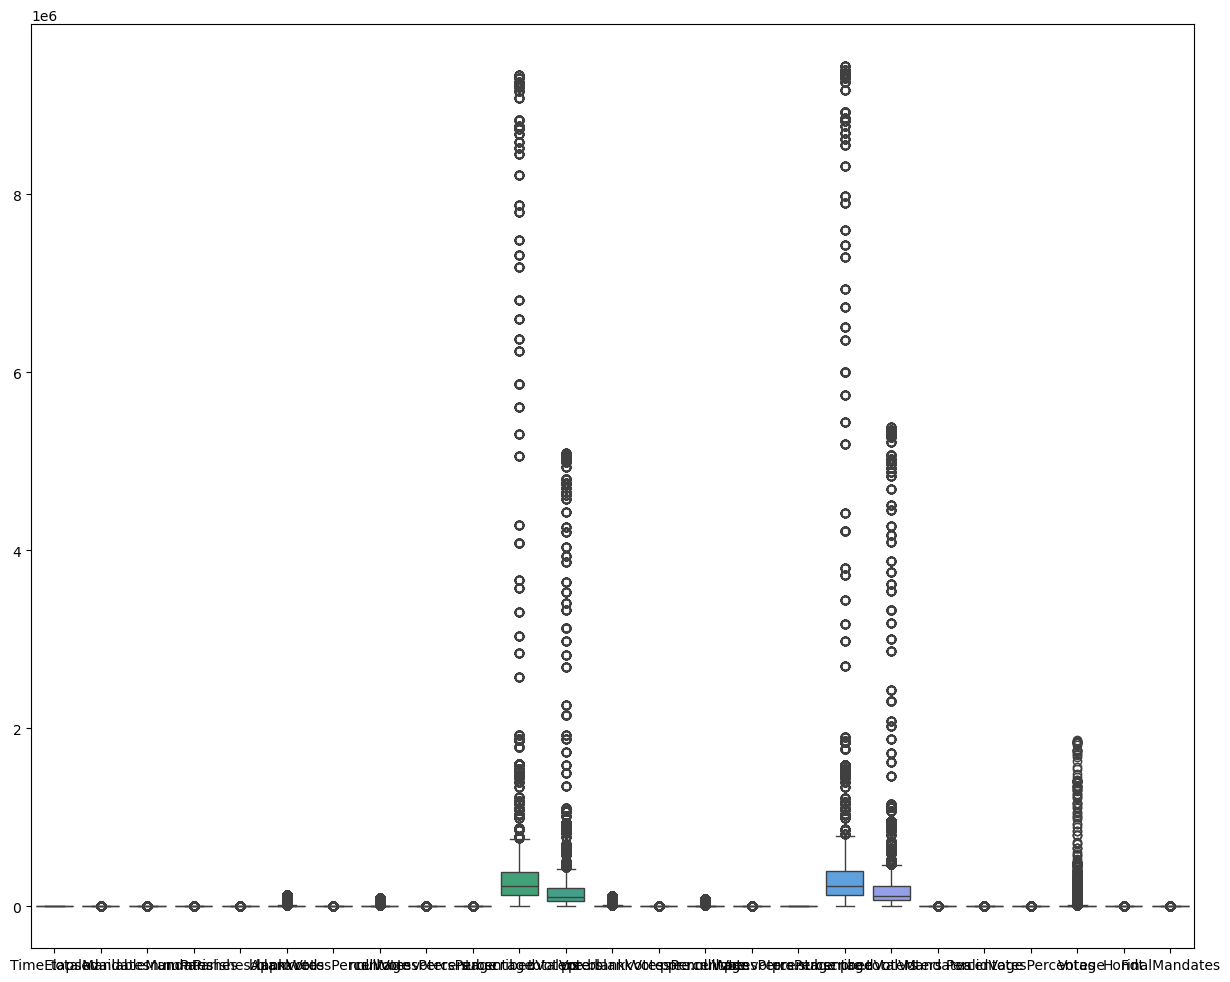

In [16]:
#VISUALIZATION OF DATA 
plt.figure(figsize=(15,12))
sns.boxplot(df)

In [17]:
#FINDING OUTLIERS

def outliers(df):
    for col in df.select_dtypes(include=['float64','int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Bound = Q1 - (1.5 * IQR)
        Upper_Bound = Q3 + (1.5 * IQR)

        df[col] = df[col].apply( lambda x : Lower_Bound if x < Lower_Bound else Upper_Bound if x > Upper_Bound else x )

    return df

In [18]:
df1=outliers(df)

<Axes: >

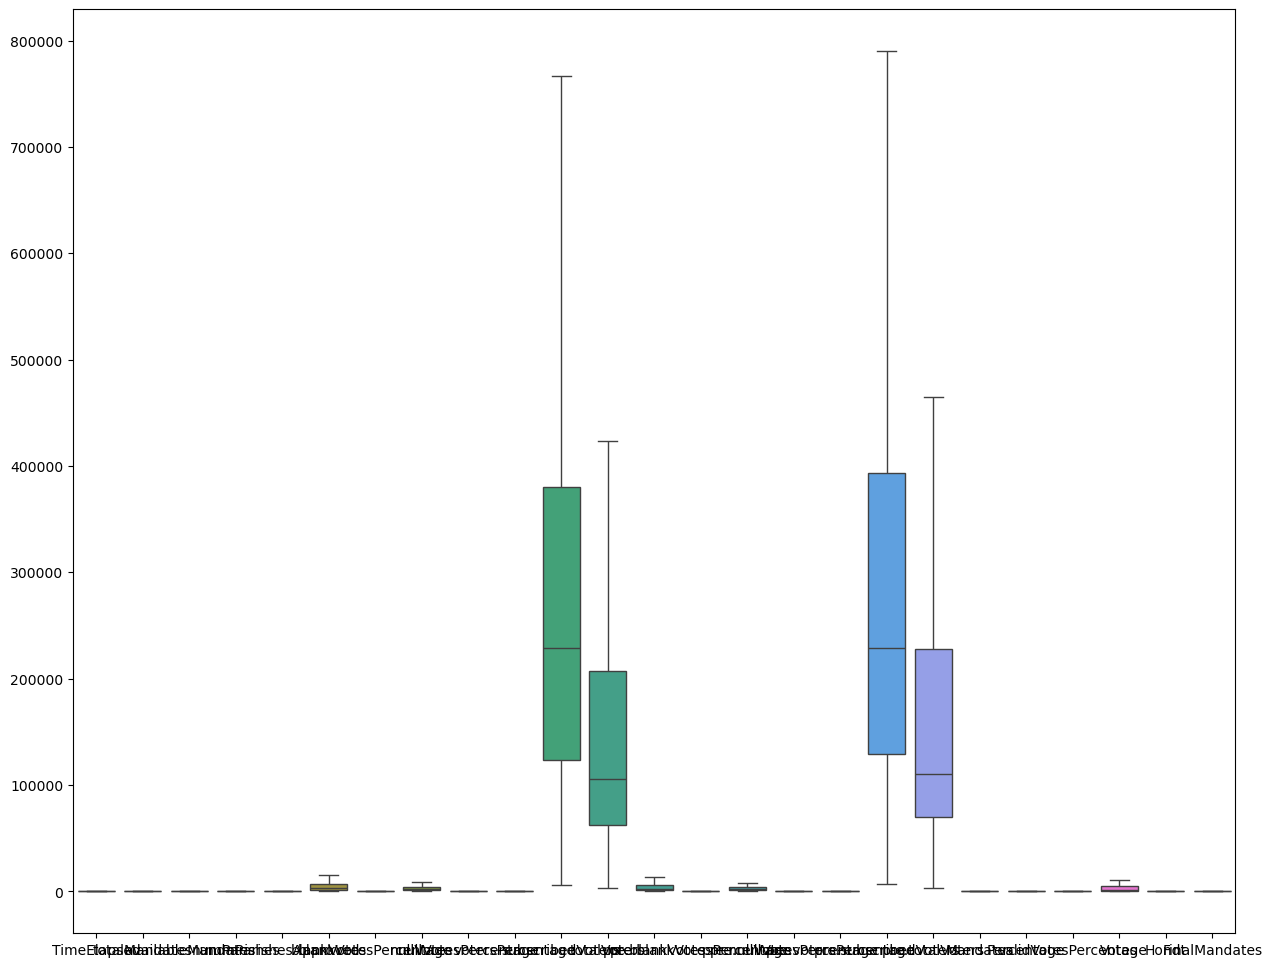

In [19]:
plt.figure(figsize=(15,12))
sns.boxplot(df1)

In [20]:
#DROP UNWANTED COLUMNS
df1=df1.drop(columns=['time','Party','territoryName','Mandates','Hondt','FinalMandates'])                    

In [21]:
df1.head()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,Votes
0,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,7.195,7.555,10921.0
1,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,7.195,7.555,10921.0
2,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,6.810,7.150,10921.0
3,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,4.900,5.140,10921.0
4,0,0.0,22.5,492.5,419.5,9652.0,2.5,8661.5,2.3,51.36,...,8317.0,1.94,8171.0,1.91,52.66,789896.0,428546.0,4.590,4.830,10921.0


In [22]:
#FEATURE ENGINEERING
pt=PowerTransformer(method='yeo-johnson')

In [23]:
numerical_features=df1.select_dtypes(include=['float64','int64']).columns

In [24]:
df1[numerical_features]=pt.fit_transform(df1[numerical_features])

In [25]:
#CHECKING SKEW AND KURTOSIS
df1[numerical_features].skew()

TimeElapsed                -0.306219
totalMandates              -0.025199
availableMandates           0.122640
numParishes                 0.005755
numParishesApproved        -0.053527
blankVotes                 -0.071032
blankVotesPercentage        0.020298
nullVotes                  -0.080674
nullVotesPercentage         0.041901
votersPercentage           -0.042573
subscribedVoters           -0.101867
totalVoters                -0.084458
pre.blankVotes             -0.066772
pre.blankVotesPercentage    0.034540
pre.nullVotes              -0.095531
pre.nullVotesPercentage     0.014256
pre.votersPercentage       -0.184101
pre.subscribedVoters       -0.097851
pre.totalVoters            -0.076318
Percentage                  0.378590
validVotesPercentage        0.373076
Votes                      -0.035944
dtype: float64

In [26]:
df2=df1[numerical_features]

In [27]:
#CORRELATION
correlation=df2.corr()
correlation

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,Votes
TimeElapsed,1.000000,0.749822,-0.626845,0.001273,0.387991,0.538633,0.051554,0.554941,-0.199807,0.052288,...,0.557561,0.108332,0.573367,-0.090531,0.061075,0.583511,0.579351,0.029081,0.029017,0.380162
totalMandates,0.749822,1.000000,-0.264027,0.290125,0.582905,0.856297,0.125239,0.875597,-0.261310,0.318876,...,0.872799,0.178681,0.882849,-0.204753,0.212050,0.894533,0.890323,0.004637,0.004310,0.526818
availableMandates,-0.626845,-0.264027,1.000000,0.162037,-0.156463,0.027395,0.001134,0.009004,-0.062553,0.255823,...,0.015406,-0.011035,-0.003521,-0.110033,0.203911,-0.012584,-0.001522,-0.024213,-0.024672,-0.031009
numParishes,0.001273,0.290125,0.162037,1.000000,0.825176,0.466706,0.327451,0.441930,0.362678,0.110746,...,0.437714,0.313643,0.376188,0.042485,-0.146604,0.390926,0.373675,-0.070716,-0.068948,0.186187
numParishesApproved,0.387991,0.582905,-0.156463,0.825176,1.000000,0.688522,0.233761,0.697397,0.214170,0.039733,...,0.680910,0.250937,0.658002,0.018030,-0.147325,0.672559,0.655205,-0.043480,-0.042401,0.391411
blankVotes,0.538633,0.856297,0.027395,0.466706,0.688522,1.000000,0.381808,0.958619,-0.174346,0.398694,...,0.996520,0.423201,0.932149,-0.279369,0.279618,0.962679,0.965080,-0.009146,-0.008258,0.556560
blankVotesPercentage,0.051554,0.125239,0.001134,0.327451,0.233761,0.381808,1.000000,0.174820,0.161887,0.025481,...,0.335073,0.965773,0.119249,-0.071278,-0.065960,0.177822,0.167995,-0.012564,-0.007818,0.073904
nullVotes,0.554941,0.875597,0.009004,0.441930,0.697397,0.958619,0.174820,1.000000,-0.090835,0.400110,...,0.971477,0.217198,0.988773,-0.137423,0.244706,0.987510,0.988997,-0.010213,-0.010292,0.572321
nullVotesPercentage,-0.199807,-0.261310,-0.062553,0.362678,0.214170,-0.174346,0.161887,-0.090835,1.000000,-0.214648,...,-0.178846,0.143924,-0.137261,0.665506,-0.349181,-0.211254,-0.218489,-0.024892,-0.022716,-0.126520
votersPercentage,0.052288,0.318876,0.255823,0.110746,0.039733,0.398694,0.025481,0.400110,-0.214648,1.000000,...,0.387145,0.001029,0.354969,-0.426438,0.888275,0.353829,0.406768,-0.023488,-0.024374,0.168028


<Axes: >

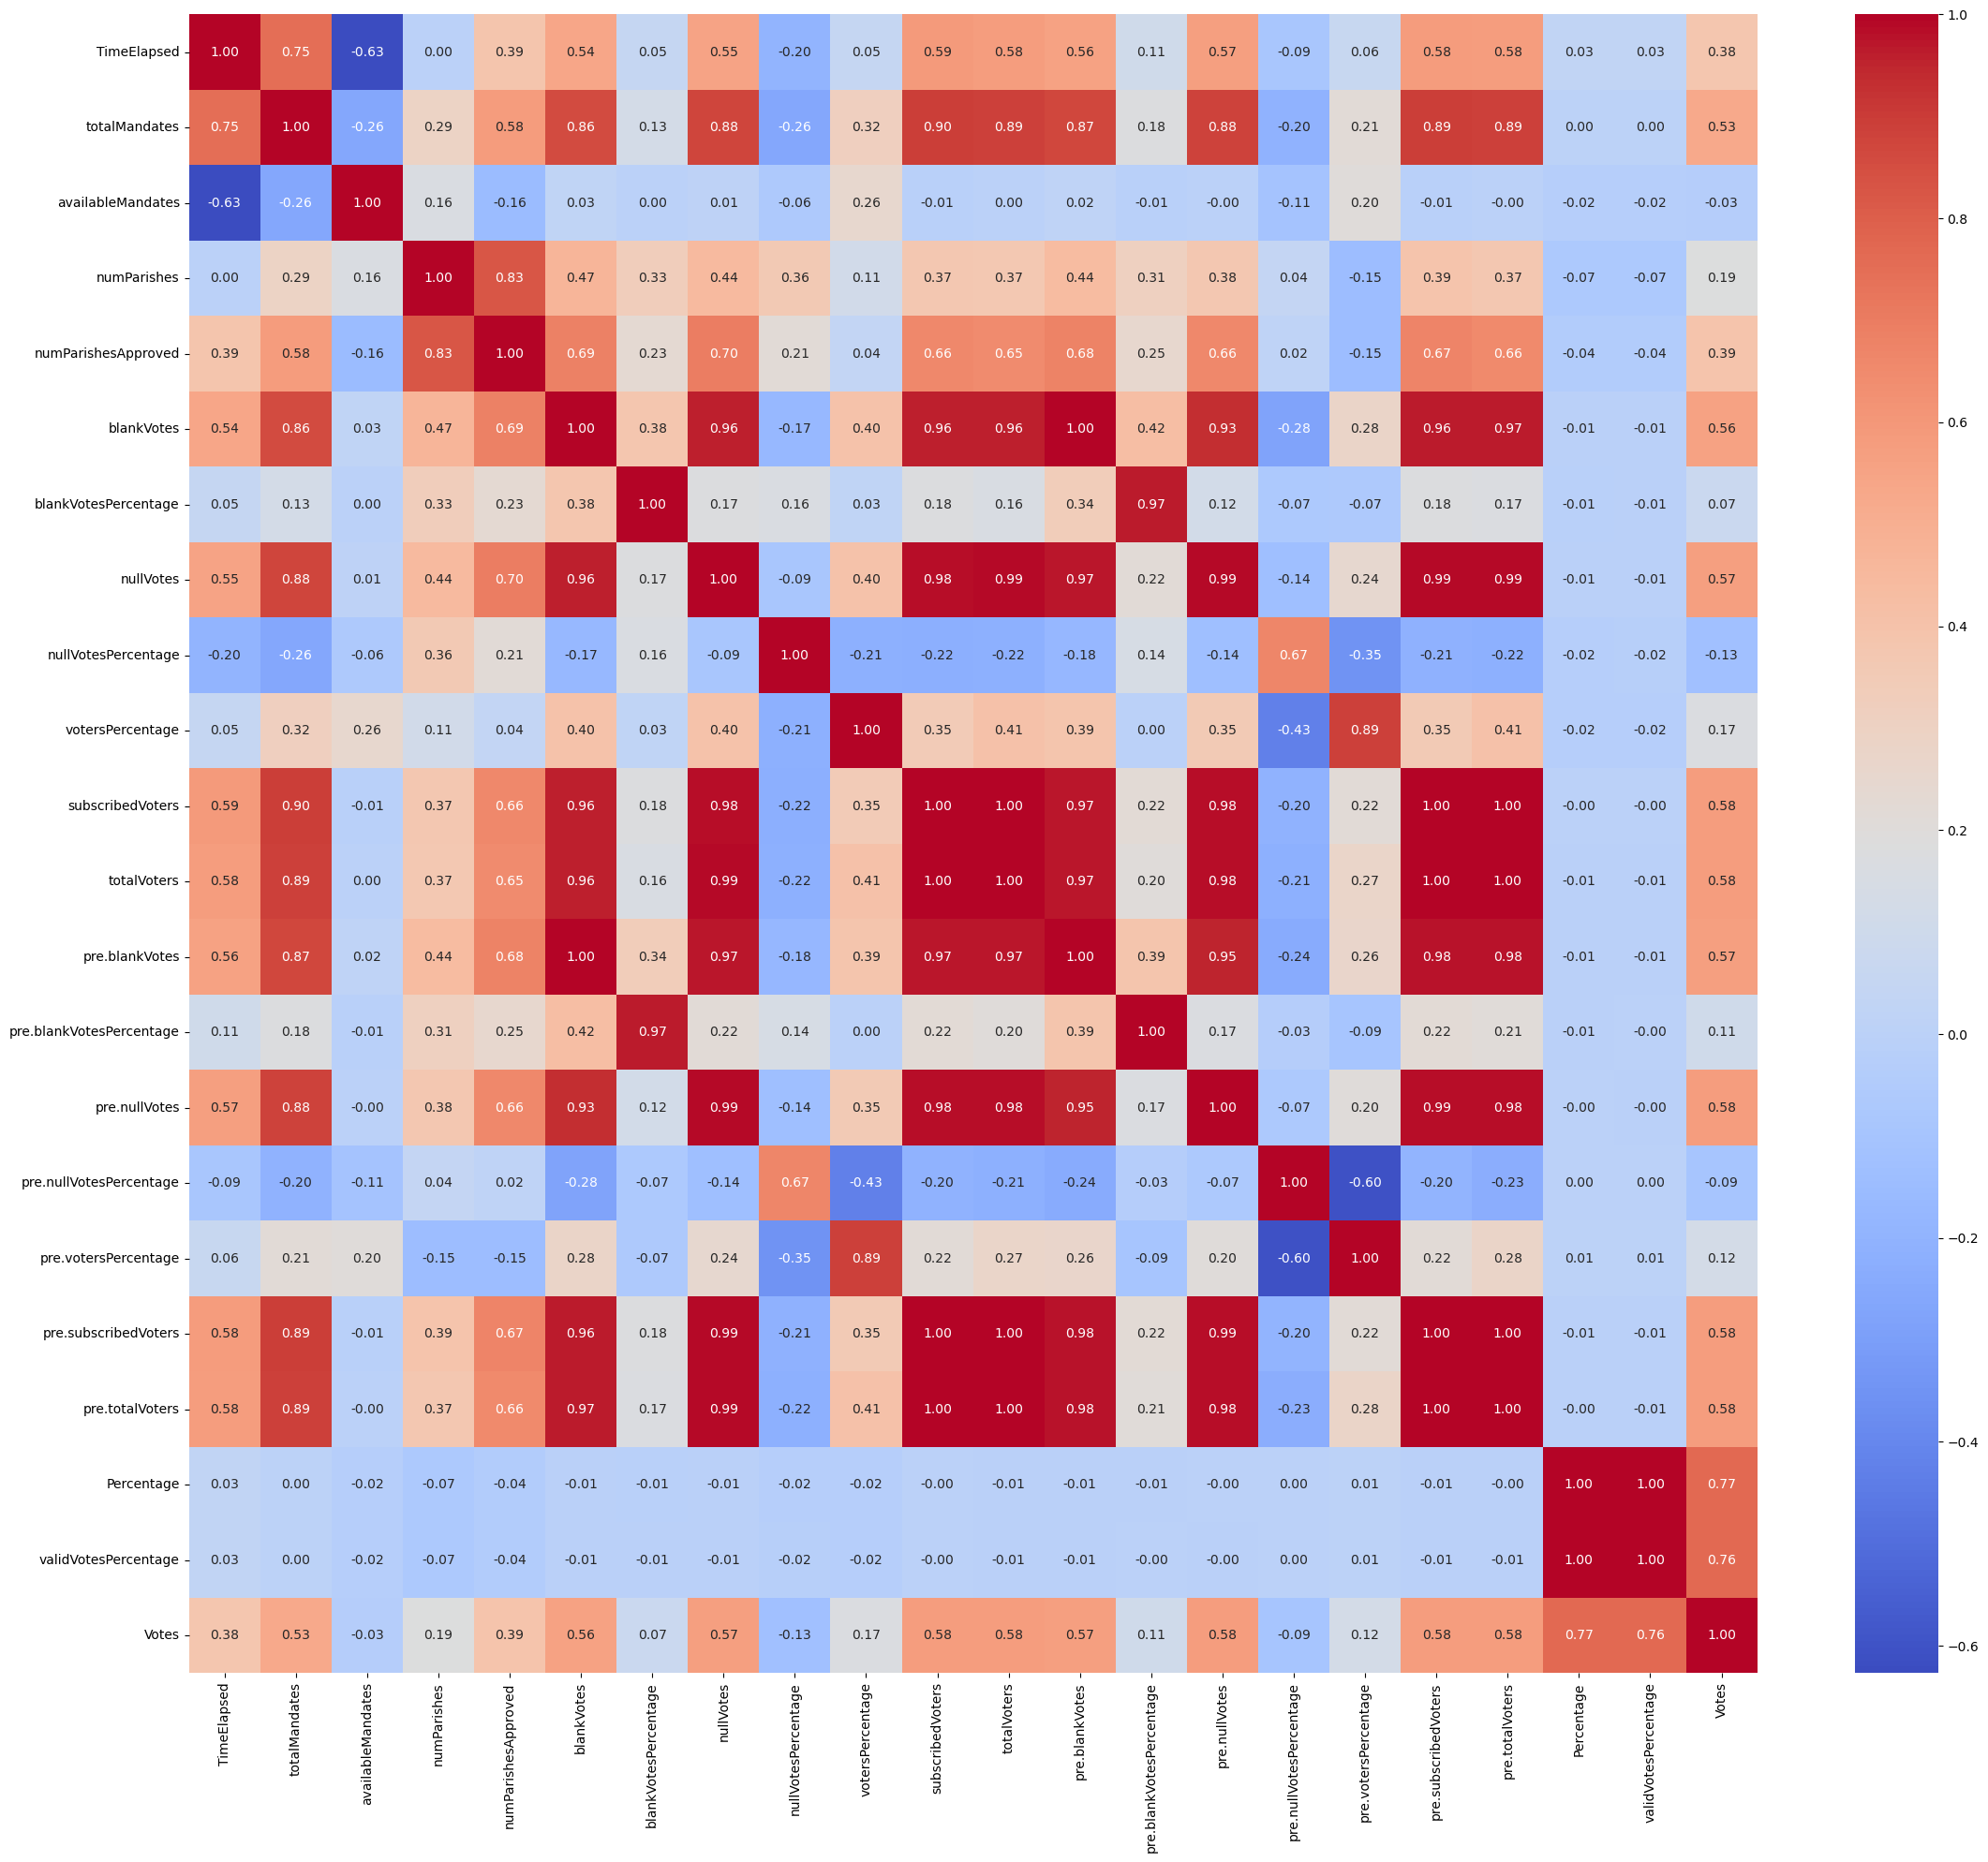

In [28]:
plt.figure(figsize=(27,23))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')

In [29]:
x=df2.drop('Votes',axis=1)
y=df2['Votes']

In [30]:
#FEATURE SELECTION
sk=SelectKBest(score_func=f_regression,k=19)
x_num=sk.fit_transform(x,y)

In [31]:
selected_features=x.columns[sk.get_support()]
feature_scores=pd.DataFrame({'feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending=False)

print("selected features:",selected_features)
print("\nfeature scores:")
print(feature_scores)

selected features: Index(['TimeElapsed', 'totalMandates', 'numParishes', 'numParishesApproved',
       'blankVotes', 'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Percentage', 'validVotesPercentage'],
      dtype='object')

feature scores:
                     feature         score
19                Percentage  30543.830668
20      validVotesPercentage  30510.287552
18           pre.totalVoters  10981.518444
10          subscribedVoters  10899.780261
14             pre.nullVotes  10898.482295
11               totalVoters  10888.429776
17      pre.subscribedVoters  10882.985022
7                  nullVotes  10541.392558
12            pre.blankVotes  10364.028817
5                 blankVotes   9711.832787
1              totalMandates   8313.486537
4        numP

In [32]:
x_selected=x[selected_features]

In [33]:
x_selected.columns

Index(['TimeElapsed', 'totalMandates', 'numParishes', 'numParishesApproved',
       'blankVotes', 'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Percentage', 'validVotesPercentage'],
      dtype='object')

In [34]:
#SCALING
scaler=StandardScaler()

In [35]:
x_scaled=scaler.fit_transform(x_selected)

In [36]:
#DATA SPLITTING
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [37]:
print(f"""
x train shape:{x_train.shape}
x test shape:{x_test.shape}
y train shape:{y_train.shape}
y test shape:{y_test.shape}
""")


x train shape:(17314, 19)
x test shape:(4329, 19)
y train shape:(17314,)
y test shape:(4329,)



In [38]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [39]:
#MODEL BUILDING - REGRESSION MODELS
models={
    '1.linear regression':LinearRegression(),
    '2.decision tree regressor':DecisionTreeRegressor(),
    '3.random forest regressor':RandomForestRegressor(),
    '4.gradient boosting regressor':GradientBoostingRegressor(),
    '5.svr':SVR()
}

In [40]:
#EVALUATION
result={}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    result[model_name]={'mae':mae,'mse':mse,'rmse':rmse,'r2':r2}

In [41]:
result_df=pd.DataFrame(result).T
result_df

,mae,mse,rmse,r2
1.linear regression,0.152179,0.061222,0.247432,0.938653
2.decision tree regressor,0.023168,0.008230,0.090721,0.991753
3.random forest regressor,0.021002,0.006855,0.082795,0.993131
4.gradient boosting regressor,0.057071,0.007773,0.088164,0.992211
5.svr,0.079807,0.015738,0.125453,0.984230


In [42]:
#BEST MODEL ESTIMATOR
best_model=result_df.sort_values(by='r2',ascending=False).iloc[0]
print('best_model',best_model)

best_model mae     0.021002
mse     0.006855
rmse    0.082795
r2      0.993131
Name: 3.random forest regressor, dtype: float64


In [43]:
#HYPERPARAMETER TUNING
rfg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [45]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='r2',  
    n_jobs=-1, 
    verbose=2   
)

In [46]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, max_features='sqrt',
                                             min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=50, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=2)

In [47]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.9944033141747447


In [48]:
best_model=grid_search.best_estimator_
best_model.fit(x_train_scaled,y_train)

y_test_pred=best_model.predict(x_test_scaled)

test_mae=mean_absolute_error(y_test,y_test_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
test_r2=r2_score(y_test,y_test_pred)

print(f"test mae:{test_mae}")
print(f"test mse:{test_mse}")
print(f"test rmse:{test_rmse}")
print(f"test r2:{test_r2}")

test mae:0.04748058411084537
test mse:0.010330888920139879
test rmse:0.10164098051543914
test r2:0.9896481047049871


In [49]:
y_train_pred=best_model.predict(x_train_scaled)
residuals=y_train-y_train_pred

In [50]:
#PIPELINE CREATION
from sklearn.pipeline import Pipeline

In [51]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor(random_state=42))
])

In [52]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [53]:
joblib.dump(pipeline,"rfr_pipeline.joblib")

['rfr_pipeline.joblib']

In [54]:
loaded_pipeline=joblib.load('rfr_pipeline.joblib')

In [55]:
#PREDICTION 
unseen_data=pd.read_csv('Unseen.csv')

In [56]:
df_unseen=pd.DataFrame(unseen_data)

In [57]:
df_unseen.head()

,TimeElapsed,totalMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage
0,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,38.29,40.22
1,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,33.28,34.95
2,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,6.81,7.15
3,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,4.90,5.14
4,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,4.59,4.83


In [58]:
df_unseen.shape

(21643, 20)

In [59]:
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   totalMandates             21643 non-null  int64  
 2   numParishes               21643 non-null  int64  
 3   numParishesApproved       21643 non-null  int64  
 4   blankVotes                21643 non-null  int64  
 5   blankVotesPercentage      21643 non-null  float64
 6   nullVotes                 21643 non-null  int64  
 7   nullVotesPercentage       21643 non-null  float64
 8   votersPercentage          21643 non-null  float64
 9   subscribedVoters          21643 non-null  int64  
 10  totalVoters               21643 non-null  int64  
 11  pre.blankVotes            21643 non-null  int64  
 12  pre.blankVotesPercentage  21643 non-null  float64
 13  pre.nullVotes             21643 non-null  int64  
 14  pre.nu

In [60]:
x_unseen=df_unseen.drop('validVotesPercentage',axis=1)
y_unseen=df_unseen['validVotesPercentage']

In [61]:
y_pred_unseen=loaded_pipeline.predict(x_unseen)

C:\Users\ansar\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [62]:
unseen_mae=mean_absolute_error(y_unseen,y_pred_unseen)
unseen_mse=mean_squared_error(y_unseen,y_pred_unseen)
unseen_rmse=np.sqrt(mean_squared_error(y_unseen,y_pred_unseen))
unseen_r2=r2_score(y_unseen,y_pred_unseen)

print(f"unseen mae:{unseen_mae}")
print(f"unseen mse:{unseen_mse}")
print(f"unseen rmse:{unseen_rmse}")
print(f"unseen r2:{unseen_r2}")

unseen mae:5.085398240559847
unseen mse:132.94578850172437
unseen rmse:11.530211988585656
unseen r2:-0.12291897068840574


In [64]:
df_unseen['predicted_election_result']=y_pred_unseen
df_unseen.to_csv('unseen_predictions.csv',index=False)
print("prediction saved to'unseen_prediction.csv'.")

prediction saved to'unseen_prediction.csv'.


In [72]:
predicted_df=pd.read_csv('unseen_predictions.csv')
predicted_df.head(20)

,TimeElapsed,totalMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,...,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,predicted_election_result
0,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,38.29,40.22,1.396988
1,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,33.28,34.95,1.396988
2,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,6.81,7.15,1.396988
3,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,4.90,5.14,1.396988
4,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,4.59,4.83,1.396988
5,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,1.76,1.84,1.396988
6,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,0.95,0.99,1.421001
7,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,0.88,0.93,1.420238
8,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,0.66,0.70,1.413721
9,0,0,3092,1081,9652,2.5,8874,2.3,51.36,752529,...,8317,1.94,8171,1.91,52.66,813743,428546,0.48,0.51,1.413721


In [74]:
predicted_df.tail(20)

,TimeElapsed,totalMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,...,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage,predicted_election_result
21623,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,36.24,38.10,1.395138
21624,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,35.37,37.19,1.395138
21625,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,7.86,8.26,1.395138
21626,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,5.89,6.19,1.395138
21627,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,2.30,2.42,1.395138
21628,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,2.13,2.24,1.395138
21629,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,0.97,1.02,1.422625
21630,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,0.75,0.79,1.419696
21631,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,0.68,0.72,1.416876
21632,265,8,277,277,4995,2.81,3700,2.08,51.04,348061,...,4235,2.22,3632,1.9,51.28,371931,190712,0.55,0.58,1.416876
